**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [5]:
from ExchangeEconomyM import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [8]:
model = ExchangeEconomyClass()

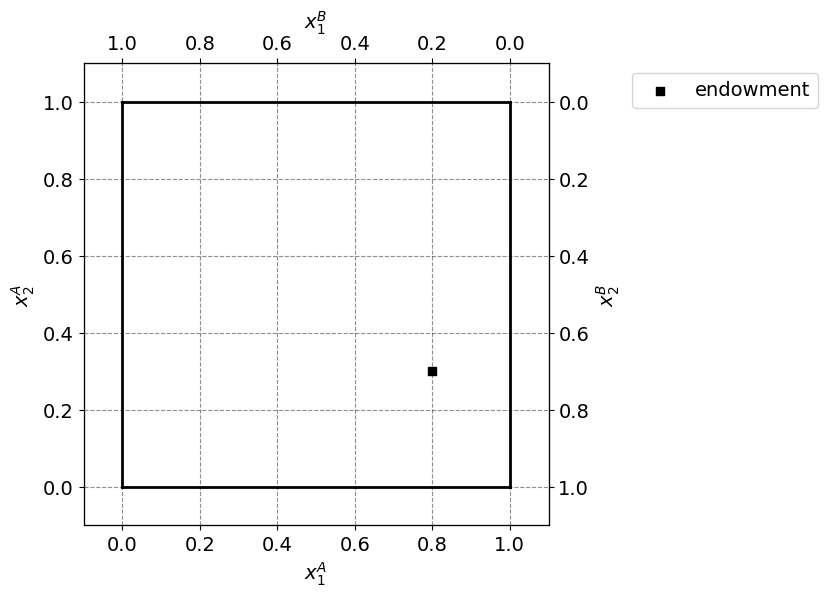

In [9]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

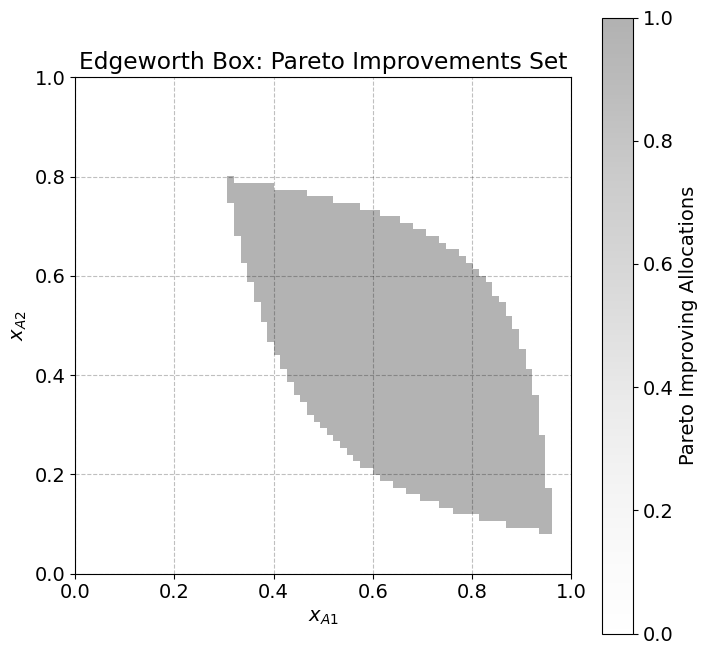

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

class ExchangeEconomyClass:
    def __init__(self):
        # Initialize model parameters
        par = self.par = SimpleNamespace()
        par.alpha = 1/3  # Preference parameter for consumer A
        par.beta = 2/3   # Preference parameter for consumer B
        par.w1A = 0.8    # Initial endowment of good 1 for consumer A
        par.w2A = 0.3    # Initial endowment of good 2 for consumer A

        # Calculate initial utility levels based on the endowments
        self.uA_initial = self.utility_A(par.w1A, par.w2A)
        self.uB_initial = self.utility_B(1 - par.w1A, 1 - par.w2A)

    def utility_A(self, x1A, x2A):
        # Utility function for consumer A
        return x1A ** self.par.alpha * x2A ** (1 - self.par.alpha)

    def utility_B(self, x1B, x2B):
        # Utility function for consumer B
        return x1B ** self.par.beta * x2B ** (1 - self.par.beta)

    def find_pareto_improvements(self):
        # Generate a grid of possible allocations for xA1 and xA2
        N = 75
        x1A_grid = np.linspace(0, 1, N)
        x2A_grid = np.linspace(0, 1, N)
        pareto_set = np.zeros((N, N))

        # Check each allocation to see if it's a Pareto improvement
        for i, x1A in enumerate(x1A_grid):
            for j, x2A in enumerate(x2A_grid):
                x1B, x2B = 1 - x1A, 1 - x2A
                uA = self.utility_A(x1A, x2A)
                uB = self.utility_B(x1B, x2B)

                # Mark the allocation if it improves both A's and B's utility
                if uA >= self.uA_initial and uB >= self.uB_initial:
                    pareto_set[i, j] = 1

        return x1A_grid, x2A_grid, pareto_set

# Initialize the economy class and find the Pareto improvements
economy = ExchangeEconomyClass()
x1A_grid, x2A_grid, pareto_set = economy.find_pareto_improvements()

# Visualize the Pareto improvements in the Edgeworth box
plt.figure(figsize=(8, 8))
plt.imshow(pareto_set, extent=(0, 1, 0, 1), origin='lower', cmap='Greys', alpha=0.3)
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.title('Edgeworth Box: Pareto Improvements Set')
plt.colorbar(label='Pareto Improving Allocations')
plt.grid(True)
plt.show()

The above edgeworth box shows that there are many possible ways to allocate the goods between the two agents, since each represents a unique combination of quantities of the good consumed by each individual.

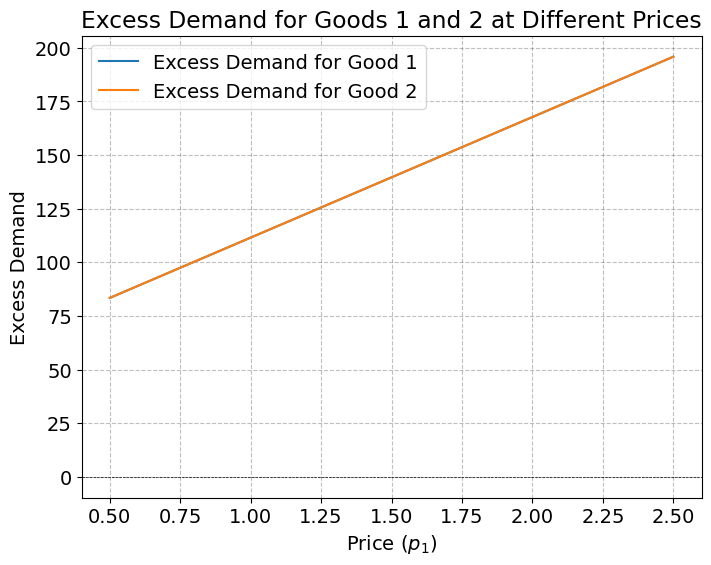

In [25]:
# Define the allocation vector p1
N = 75  # Assuming the same grid size as used before
p1 = np.linspace(0.5, 2.5, num=N)

# Initialize arrays to store excess demand
excess_demand_1 = np.zeros_like(p1)
excess_demand_2 = np.zeros_like(p1)

# Calculate excess demand for each price in p1
for i, price in enumerate(p1):
    # Calculate total consumption of good 1 by both agents
    total_consumption_good_1 = x1A_grid * (price / par.alpha) + x1A_grid * ((1 - price) / (1 - par.alpha))
    
    # Calculate excess demand for good 1
    excess_demand_1[i] = np.sum(total_consumption_good_1) - w1bar
    
    # Calculate total consumption of good 2 by both agents
    total_consumption_good_2 = x2A_grid * (price / par.alpha) + x2A_grid * ((1 - price) / (1 - par.alpha))
    
    # Calculate excess demand for good 2
    excess_demand_2[i] = np.sum(total_consumption_good_2) - w2bar

# Plot excess demand for both goods
plt.figure(figsize=(8, 6))
plt.plot(p1, excess_demand_1, label='Excess Demand for Good 1')
plt.plot(p1, excess_demand_2, label='Excess Demand for Good 2')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Price ($p_1$)')
plt.ylabel('Excess Demand')
plt.title('Excess Demand for Goods 1 and 2 at Different Prices')
plt.legend()
plt.grid(True)
plt.show()